### ANJALI RANA
### Std. ID: 216752057

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the dataset
# Replace 'path_to_data' with the actual path to the data files
# adult_data = pd.read_csv("adult.data", header=None, names=columns, na_values=" ?", skipinitialspace=True)
# adult_test = pd.read_csv("adult.test", header=1, names=columns, na_values=" ?", skipinitialspace=True)

# train_data_path = 'path_to_data/adult.data'
# test_data_path = 'path_to_data/adult.test'

# Define column names based on dataset structure
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Load train and test datasets
train_data = pd.read_csv("adult.data", header=None, names=columns, na_values=" ?", skipinitialspace=True)
test_data = pd.read_csv("adult.test", header=None, names=columns, skiprows=1, na_values=" ?", skipinitialspace=True)

# Combine train and test data for preprocessing
data = pd.concat([train_data, test_data], ignore_index=True)

# Step 2: Explore the dataset
print("First few rows of the dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nTarget Variable Distribution:")
print(data['income'].value_counts())

# Step 3: Handle missing values
data = data.dropna()

# Step 4: Separate features and target
X = data.drop(columns=["income"])
y = data["income"].apply(lambda x: 1 if ">50K" in x else 0)  # Encode target as binary

# Step 5: Define preprocessing pipeline
categorical_columns = X.select_dtypes(include=["object"]).columns
numerical_columns = X.select_dtypes(exclude=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(drop="first"), categorical_columns)
    ]
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Step 7: Deep Learning Model (Starter Code)
# Uncomment the following block to start building your model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim),  # Choose appropriate activation function
        Dropout(0.3), # Feel free to remove the Dropout layers if they are not needed
        Dense(64),  # Choose appropriate activation function
        Dropout(0.3),
        Dense(1),  # Choose appropriate activation function for binary classification
    ])
    # Compile the model with an optimizer and loss function
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate and train the model
model = build_model(X_train.shape[1])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Step 8: Model Evaluation
# Uncomment this block to evaluate your model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


First few rows of the dataset:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1          

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.7890 - loss: 2.4026 - val_accuracy: 0.8119 - val_loss: 2.7090
Epoch 2/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.8117 - loss: 2.5598 - val_accuracy: 0.8411 - val_loss: 2.0923
Epoch 3/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.8254 - loss: 2.4833 - val_accuracy: 0.8333 - val_loss: 2.4137
Epoch 4/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.8258 - loss: 2.4887 - val_accuracy: 0.8328 - val_loss: 2.2910
Epoch 5/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.8134 - loss: 2.5977 - val_accuracy: 0.8344 - val_loss: 2.4961
Epoch 6/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.8357 - loss: 2.4772 - val_accuracy: 0.8450 - val_loss: 2.2766
Epoch 7/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.8351 - loss: 2.4266 - val_accuracy: 0.8261 - val_loss: 2.5804
Epoch 8/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - accuracy: 0.8345 - loss: 2.4631 - val_accurac

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the outcomes on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)  # Convert report to a dictionary for easy access

# Extract the metrics specifically for ">50K" (class 1)
class_1_metrics = report['1']  # Metrics for class 1 (">50K")

# Print the metrics for class ">50K"
print("\nMetrics for predicting income '>50K':")
print(f"Precision: {class_1_metrics['precision']:.2f}")
print(f"Recall: {class_1_metrics['recall']:.2f}")
print(f"F1-Score: {class_1_metrics['f1-score']:.2f}")
print(f"Support: {class_1_metrics['support']}")


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step

Metrics for predicting income '>50K':
Precision: 0.73
Recall: 0.53
F1-Score: 0.61
Support: 2355.0


In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
# Reshape data for CNN
X_train_reshaped = X_train.toarray().reshape(X_train.shape[0], X_train.shape[1], 1)  # Convert sparse to dense if necessary
X_test_reshaped = X_test.toarray().reshape(X_test.shape[0], X_test.shape[1], 1)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),  # Flatten the 1D output into a vector
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Binary classification output
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [30]:
# Reshape data for CNN
X_train_reshaped = X_train.toarray().reshape(X_train.shape[0], X_train.shape[1], 1)  # Add channel dimension
X_test_reshaped = X_test.toarray().reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
cnn_model = build_cnn_model((X_train_reshaped.shape[1], 1))  # Input shape: (features, 1 channel)

# Train the CNN model
history = cnn_model.fit(
    X_train_reshaped, y_train, 
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=10,            # Number of training epochs
    batch_size=32,        # Batch size
    verbose=1             # Print training progress
)


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8190 - loss: 0.3907 - val_accuracy: 0.8480 - val_loss: 0.3333
Epoch 2/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8409 - loss: 0.3476 - val_accuracy: 0.8527 - val_loss: 0.3220
Epoch 3/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8455 - loss: 0.3320 - val_accuracy: 0.8560 - val_loss: 0.3173
Epoch 4/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8427 - loss: 0.3349 - val_accuracy: 0.8550 - val_loss: 0.3164
Epoch 5/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8514 - loss: 0.3283 - val_accuracy: 0.8575 - val_loss: 0.3140
Epoch 6/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8498 - loss: 0.3242 - val_accuracy: 0.8545 - val_loss: 0.3164
Epoch 7/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8519 - loss: 0.3241 - val_accuracy: 0.8590 - val_loss: 0.3108
Epoch 8/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8522 - loss: 0.3210 - val_accuracy: 0.8562 - val_

- The model is generalizing the problem well as we see the training accuracy (85.10%) is very close to the validation accuracy (85.71%) by the 10th epoch and both training and validation accuracy stays close throughout all 1-10th epoch, making it that model is generalize. Similarly, the training loss (0.3224) and validation loss (0.3119) are also nearly identical which shows that the model performs consistently on both the training and validation data. Hence indicating  that the model is neither overfitting nor underfitting but is generalizing the problem.

- Now as you may see in the jupyterfile, the training accuracy steadily improves from 81.90% in the first epoch to 85.10% by the 10th epoch, which tells that the model is learning effectively. Same with the validation accuracy which starts improving early and stabilizes between 85.6% and 85.9% in the later epochs.

- Now this close match between training and validation performance suggests that the model is balanced and overall generalizes well to unseen data.

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# history = cnn_model.fit(X_train_reshaped, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping])


Epoch 1/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8555 - loss: 0.3158 - val_accuracy: 0.8612 - val_loss: 0.3119
Epoch 2/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8506 - loss: 0.3227 - val_accuracy: 0.8596 - val_loss: 0.3097
Epoch 3/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8568 - loss: 0.3126 - val_accuracy: 0.8587 - val_loss: 0.3094
Epoch 4/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8507 - loss: 0.3203 - val_accuracy: 0.8581 - val_loss: 0.3088
Epoch 5/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8518 - loss: 0.3204 - val_accuracy: 0.8582 - val_loss: 0.3088
Epoch 6/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8512 - loss: 0.3171 - val_accuracy: 0.8557 - val_loss: 0.3122
Epoch 7/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8601 - loss: 0.3093 - val_accuracy: 0.8594 - val_loss: 0.3126
Epoch 8/20
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8555 - loss: 0.3153 - val_accuracy: 0.

In [ ]:
# Build the CNN
#cnn_model = build_cnn_model((X_train_reshaped.shape[1], 1))  # Shape: (features, 1 channel)


In [31]:
# Evaluate on test set
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {cnn_loss:.4f}, Test Accuracy: {cnn_accuracy:.4f}")

# Classification report
y_pred_cnn = (cnn_model.predict(X_test_reshaped) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cnn))


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.8462 - loss: 0.3217
Test Loss: 0.3193, Test Accuracy: 0.8502
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7414
           1       0.77      0.54      0.64      2355

    accuracy                           0.85      9769
   macro avg       0.82      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [33]:
#Feature selection
import numpy as np
from sklearn.metrics import accuracy_score

# Define a function to evaluate the CNN model accuracy
def cnn_model_score(X, y):
    y_pred = (cnn_model.predict(X) > 0.5).astype(int)
    return accuracy_score(y, y_pred)

# Calculate baseline accuracy for the CNN model
cnn_baseline_score = cnn_model_score(X_test_reshaped, y_test)

# Calculate permutation importance for CNN
cnn_importance = []
for col in range(X_test_dense.shape[1]):
    X_test_shuffled = X_test_dense.copy()
    np.random.shuffle(X_test_shuffled[:, col])  # Shuffle one column at a time
    
    # Reshape back to CNN input format
    X_test_shuffled_reshaped = X_test_shuffled.reshape(X_test_shuffled.shape[0], X_test_shuffled.shape[1], 1)
    
    # Evaluate accuracy with shuffled feature
    shuffled_score = cnn_model_score(X_test_shuffled_reshaped, y_test)
    cnn_importance.append(cnn_baseline_score - shuffled_score)

# Map feature indices to feature names
feature_names = preprocessor.get_feature_names_out()
cnn_feature_importances = list(zip(feature_names, cnn_importance))

# Sort features by importance
sorted_cnn_features = sorted(cnn_feature_importances, key=lambda x: x[1], reverse=True)

# Display the top 3 features
print("\nTop 3 Features Contributing to Income Prediction (CNN):")
for i, (feature, imp) in enumerate(sorted_cnn_features[:3], 1):
    print(f"{i}. {feature}: {imp:.4f}")

# Optionally, display all feature importances
# for feature, imp in sorted_cnn_features:
#     print(f"{feature}: {imp:.4f}")


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
306/306 ━━━━━

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step

Confusion Matrix:
[[7015  399]
 [1049 1306]]


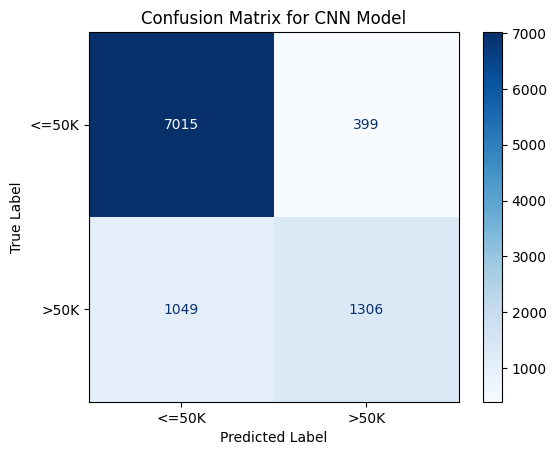

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
# Generate predictions
y_pred_cnn = (cnn_model.predict(X_test_reshaped) > 0.5).astype(int)  # Binary predictions

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_cnn)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=50K", ">50K"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix for CNN Model")
disp.ax_.set_xlabel("Predicted Label")
disp.ax_.set_ylabel("True Label")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_cnn))




- Numerical Values from the Confusion Matrix
    - True Negatives (TN): 7015 - The model correctly predicted "<=50K" for 7015 individuals.
    - False Positives (FP): 399- The model incorrectly predicted ">50K" for 399 individuals who actually earn "<=50K".
    - False Negatives (FN): 1049 - The model incorrectly predicted "<=50K" for 1049 individuals who actually earn ">50K".
    - True Positives (TP): 1306 - The model correctly predicted ">50K" for 1306 individuals

In [44]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_cnn = (cnn_model.predict(X_test_reshaped) > 0.5).astype(int)

# Get confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cnn).ravel()

# Calculate FNR and FPR
fnr = fn / (fn + tp)  # False Negative Rate
fpr = fp / (fp + tn)  # False Positive Rate

print(f"False Negative Rate (FNR) for '>50K': {fnr:.2f}")
print(f"False Positive Rate (FPR) for '>50K': {fpr:.2f}")


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step
False Negative Rate (FNR) for '>50K': 0.45
False Positive Rate (FPR) for '>50K': 0.05


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

# Adjust the decision threshold from 0.5 to 0.7
threshold = 0.7
y_pred_adjusted = (cnn_model.predict(X_test_reshaped) > threshold).astype(int)

# Generate classification report
adjusted_report = classification_report(y_test, y_pred_adjusted)
print("\nClassification Report with Threshold 0.7:")
print(adjusted_report)

# Confusion matrix
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print("\nConfusion Matrix with Threshold 0.7:")
print(cm_adjusted)

# # Classification report
# y_pred_cnn = (cnn_model.predict(X_test_reshaped) > 0.5).astype(int)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_cnn))


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step

Classification Report with Threshold 0.7:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      7414
           1       0.87      0.35      0.50      2355

    accuracy                           0.83      9769
   macro avg       0.85      0.67      0.70      9769
weighted avg       0.84      0.83      0.80      9769


Confusion Matrix with Threshold 0.7:
[[7295  119]
 [1529  826]]
